In [1]:
#讓colab能讀取到google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#將系統讀取的位置調整為google drive 所在的地方
%cd '/content/drive/My Drive/Kaggle'


/content/drive/My Drive/Kaggle


In [3]:
#讀取目前需要的python各種套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#讀取資料
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
store = pd.read_csv('store.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
train.head() #查看train資料的內容

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
test.head()#查看test資料的內容

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [7]:
store.head() #查看store資料的內容

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000


In [10]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [11]:
train.info() #查看train數據類型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [12]:
test.info()#查看test數據類型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [13]:
store.info() #查看store數據類型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [14]:
#查看 train缺失值狀況
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [15]:
#查看 test缺失值狀況
test.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [16]:
#查看 store缺失值狀況
store.isnull ().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

觀察到主要是test資料其中一個維度有缺失資料

而store 資料缺失6個維度資料

In [17]:
#先將train與 test 資料的時間型態進行拆分
#將train 跟 test 資料內的時間轉換成時間類型
train.Date = pd.to_datetime(train.Date)
test.Date = pd.to_datetime(test.Date)
store['PromoInterval'] = store['PromoInterval'].astype(str)
test['Date'] = pd.to_datetime(test['Date'])
test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Day']=test['Date'].dt.day

test["WeekOfYear"]=test['Date'].dt.weekofyear
test["Season"]=test['Date'].dt.quarter
test['SeasonOfYear']=test['Year'].replace({2013:'2013',2014:'2014',2015:'2015'})+test["Season"].replace({1:'1',2:'2',3:'3',4:'4'})



train['Date']=pd.to_datetime(train['Date'])
train['Year']=train['Date'].dt.year
train['Month']=train['Date'].dt.month
train['Day']=train['Date'].dt.day
train["WeekOfYear"]=train['Date'].dt.weekofyear
train["Season"]=train['Date'].dt.quarter
train['SeasonOfYear']=train['Year'].replace({2013:'2013',2014:'2014',2015:'2015'})+train["Season"].replace({1:'1',2:'2',3:'3',4:'4'})

一、因看起來是要將train 資料 與 test 資料 跟store 合併所以先處理store 資料缺失的部分

In [18]:

#查看store 缺失值狀況
store[store['CompetitionOpenSinceMonth'].isnull()]
#觀察到有將近354家店家不知道競爭對手開始的時間，推斷可能為這些店家開設的時間比Rossman 店面來的早所以無法推斷，又或者真的是資料缺失
#此外也500多間的店面沒有折扣促銷的情況，代表可能整間公司比較屬於單打獨鬥類型的公司，並沒有統一化的策略，又或者真的是資料缺失

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,nan
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,nan
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,nan


In [19]:
store[store['CompetitionDistance'].isnull()]
#有三間店面附近競爭者的距離是缺失的，有可能這地方只有rossman一間店面，並沒有其他類型的店面，

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,nan
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,nan
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [20]:
store["CompetitionDistance"].fillna(store["CompetitionDistance"].mean(),inplace=True)
store["CompetitionOpenSinceMonth"].fillna(store["CompetitionOpenSinceMonth"].mean(),inplace=True)
store["CompetitionOpenSinceYear"].fillna(store["CompetitionOpenSinceYear"].mean(),inplace=True)
store["Promo2SinceWeek"].fillna(0,inplace=True)
store["Promo2SinceYear"].fillna(0,inplace=True)
store["PromoInterval"].fillna(0,inplace=True)



In [21]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


整理後Store 資料已經沒有缺失值了

**二、開始整理train資料**

In [22]:
#想了解每個人平均消費的情況
train["avg_sales"]=train["Sales"]/train["Customers"]


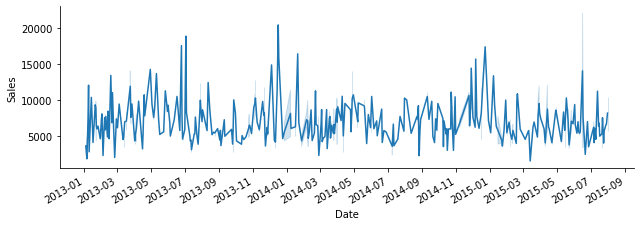

In [23]:
import matplotlib.dates as mdates

train_sales = train[train["Sales"]>0]

gsales=sns.relplot(x="Date",y="Sales",kind="line",height=3,aspect=3,data=train_sales.sample(frac=0.0005,random_state=1))
gsales.ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
gsales.fig.autofmt_xdate()

In [24]:
#再來先合併train與store的資料，並且篩選出銷售大於0的
train_df = pd.merge(train,store,on="Store")
train_df = train_df[(train_df['Open']==1)&(train_df['Sales']>0)]

In [25]:
store_type_merge = train_df.groupby("StoreType")
store_type_describe = store_type_merge.describe()
store_type_describe

Store                                ... Promo2SinceYear                        
              count        mean         std   min  ...             25%     50%     75%     max
StoreType                                          ...                                        
a          457042.0  560.087410  325.810963   2.0  ...             0.0     0.0  2012.0  2015.0
b           15560.0  555.930077  286.817822  85.0  ...             0.0     0.0  2012.0  2013.0
c          112968.0  608.222337  325.611777   1.0  ...             0.0     0.0  2011.0  2014.0
d          258768.0  533.887432  311.987681  13.0  ...             0.0  2009.0  2012.0  2015.0

[4 rows x 152 columns]

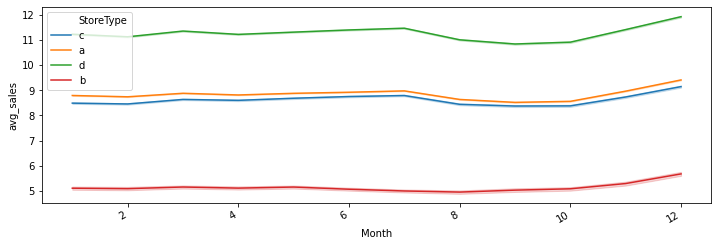

In [26]:
figtype, axestype = plt.subplots(1, 1, sharey=False, figsize=(12, 4))
sns.lineplot(x="Month", y="avg_sales",hue="StoreType",data=train_df,ax=axestype)
figtype.autofmt_xdate()

觀察到D類型店家平均每人消費金額最高

---



In [27]:
#將'PromoInterval'特徵轉化為'IsPromoMonth'特徵,表示某天某店舖是否處於促銷月，1表示是，0表示否
month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
train_df['monthStr'] = train_df.Month.map(month2str)
train_df.loc[train_df.PromoInterval == 0, 'PromoInterval'] = ''
train_df['IsPromoMonth'] = 0
for interval in train_df.PromoInterval.unique():
    if interval != '':
        for month in interval.split(','):
            train_df.loc[(train_df.monthStr == month) & (train_df.PromoInterval == interval), 'IsPromoMonth'] = 1 
# 新增'CompetitionOpen'和'PromoOpen'特征，计算某天某店铺的竞争对手已营业时间和店铺已促销时间，用月为单位表示
train_df['ct_open'] = 12 * (train_df.Year - train_df.CompetitionOpenSinceYear) +(train_df.Month - train_df.CompetitionOpenSinceMonth)
train_df['ct_open'] = train_df.ct_open.apply(lambda x: x if x > 0 else 0)        
train_df['PromoOpen'] = 12 * (train_df.Year - train_df.Promo2SinceYear) + (train_df.WeekOfYear - train_df.Promo2SinceWeek) / 4.0
train_df['PromoOpen'] = train_df.PromoOpen.apply(lambda x: x if x > 0 else 0)

In [28]:
mapping = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4,0: 0}
train_df.StoreType = train_df.StoreType.map(mapping)
train_df.Assortment = train_df.Assortment.map(mapping)
train_df.StateHoliday = train_df.StateHoliday.map(mapping)

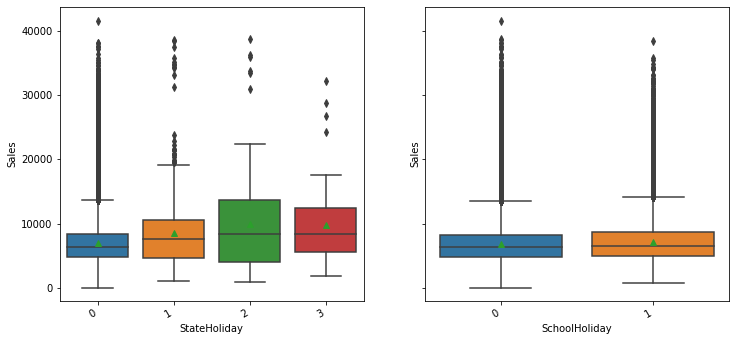

In [29]:
figHoli,axesHoli = plt.subplots(1,2,sharex=False,sharey=True,figsize=(12,6))

sns.boxplot(x="StateHoliday",y="Sales",
            showmeans=True,
            data=train_df,
            ax=axesHoli[0])
sns.boxplot(x="SchoolHoliday",y="Sales",
            showmeans=True,
            data=train_df,
            ax=axesHoli[1])

figHoli.autofmt_xdate()

觀察到D類型店家平均每人消費金額最高

---



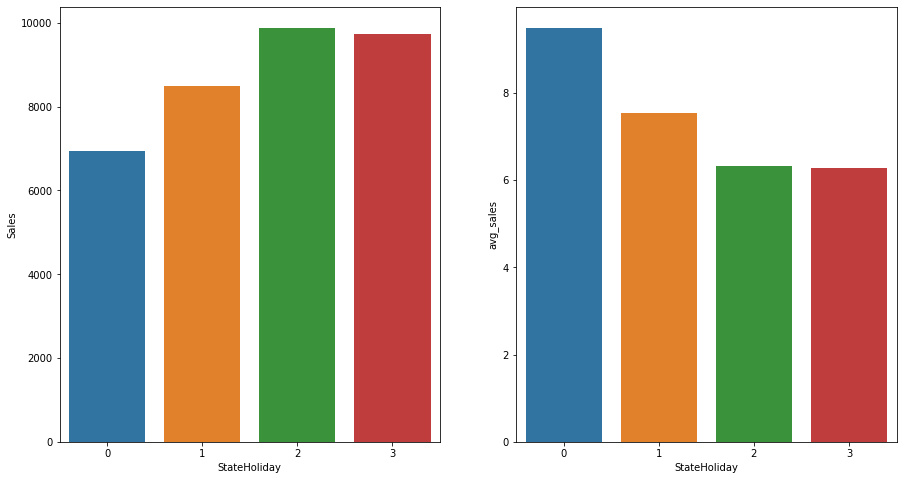

In [30]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 8))
sns.barplot(x="StateHoliday", y="Sales", data=train_df, ax=axis1, ci=None)
sns.barplot(x="StateHoliday", y="avg_sales", data=train_df, ax=axis2, ci=None)

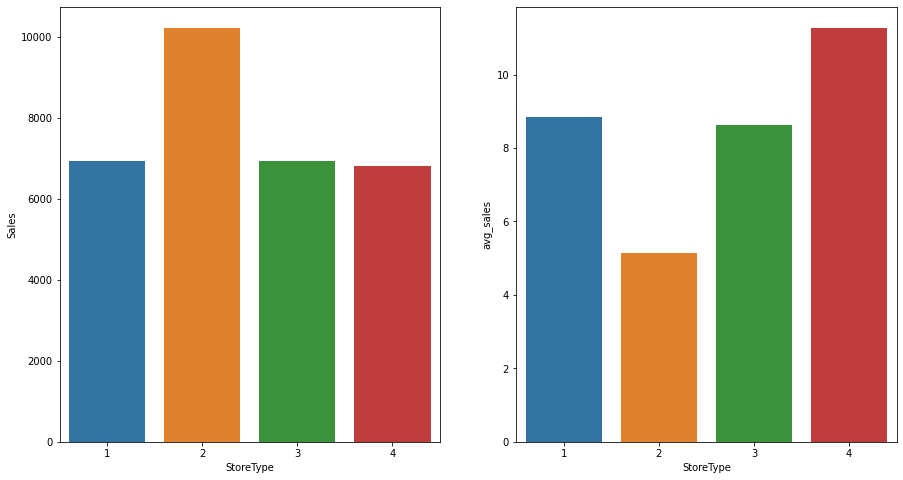

In [31]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 8))
sns.barplot(x="StoreType", y="Sales", data=train_df, ax=axis1, ci=None)
sns.barplot(x="StoreType", y="avg_sales", data=train_df, ax=axis2, ci=None)

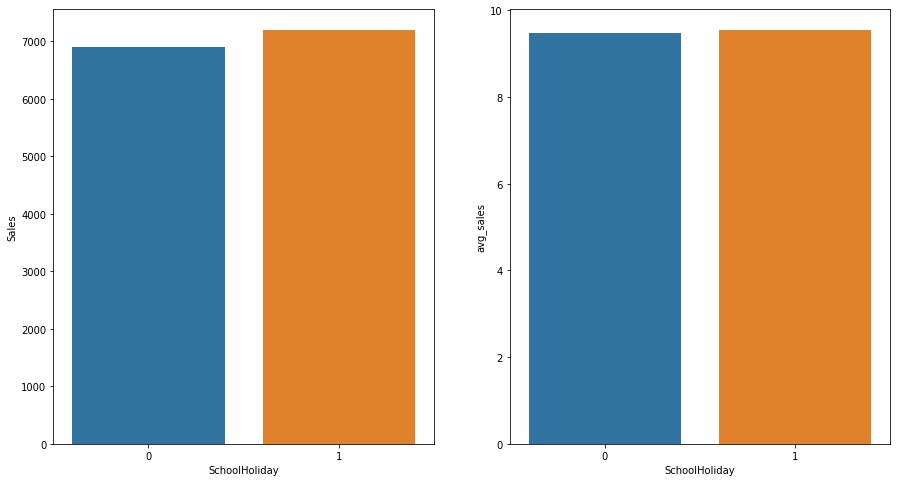

In [32]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 8))
sns.barplot(x="SchoolHoliday", y="Sales", data=train_df, ax=axis1, ci=None)
sns.barplot(x="SchoolHoliday", y="avg_sales", data=train_df, ax=axis2, ci=None)

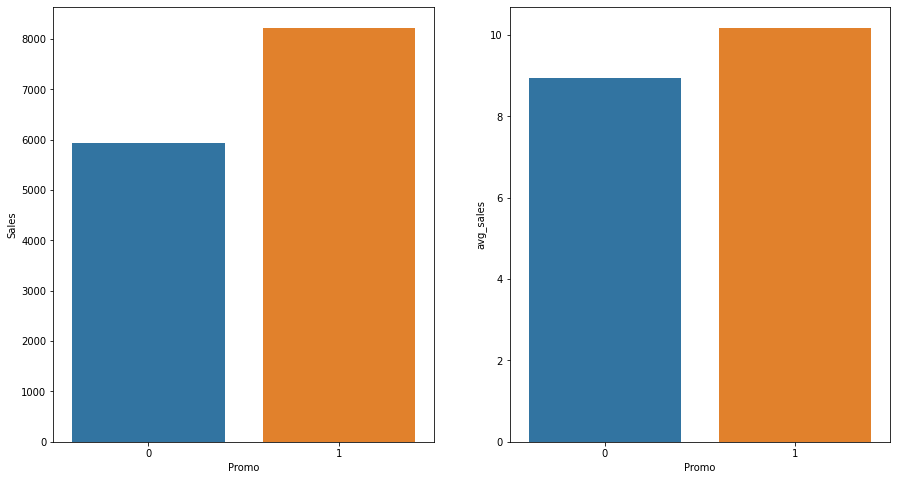

In [33]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 8))
sns.barplot(x="Promo", y="Sales", data=train_df, ax=axis1, ci=None)
sns.barplot(x="Promo", y="avg_sales", data=train_df, ax=axis2, ci=None)

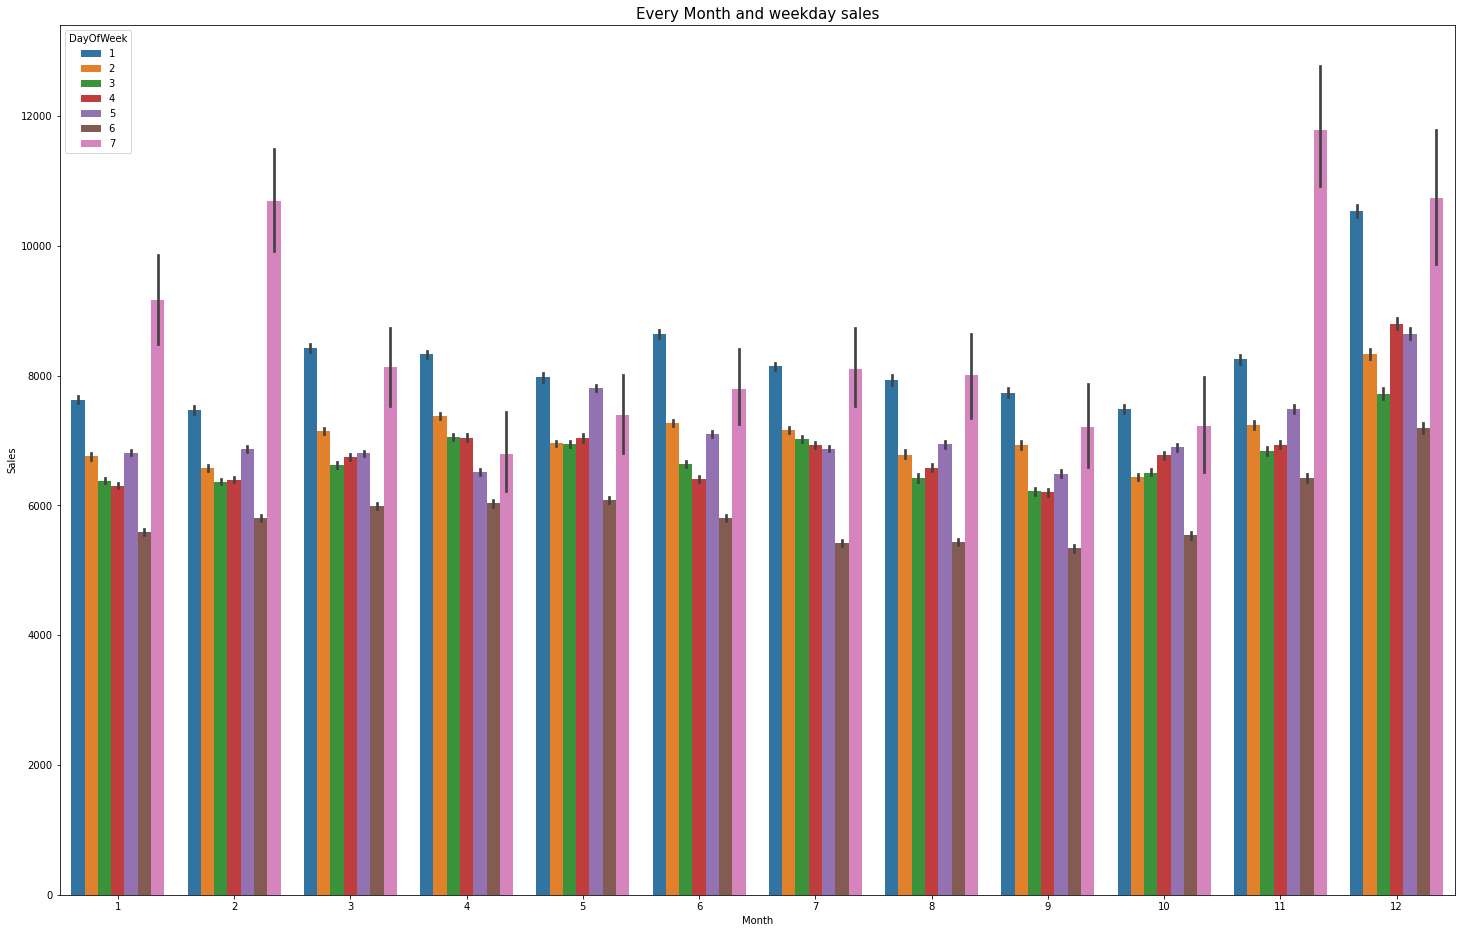

In [34]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(25, 16)
plt.title('Every Month and weekday sales', size=15) 
sns.barplot(x="Month", y="Sales", data=train_df ,hue="DayOfWeek")

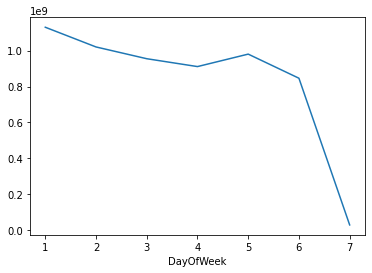

In [35]:
grouped_weekday = train_df.groupby('DayOfWeek')
sales_weekday = grouped_weekday.Sales.sum()
sales_weekday.plot()
#觀察到禮拜一與禮拜五通常業績最好但週末就會瞬間掉下來

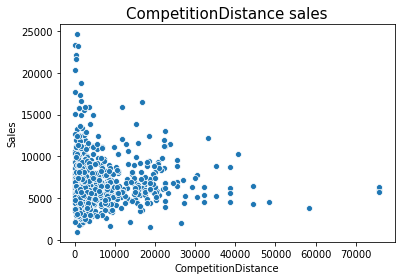

In [36]:
plt.title('CompetitionDistance sales', size=15) 
sns.scatterplot(x="CompetitionDistance", y="Sales",data=train_df.sample(frac=0.001,random_state=1))


In [37]:
test[test['Open'].isnull()]
#查看test的缺失值，觀察到全部集中在store622上，判斷單純為缺失值並無任何意義


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,Season,SeasonOfYear
479,480,622,4,2015-09-17,NaN,1,0,0,2015,9,17,38,3,20153
1335,1336,622,3,2015-09-16,NaN,1,0,0,2015,9,16,38,3,20153
2191,2192,622,2,2015-09-15,NaN,1,0,0,2015,9,15,38,3,20153
3047,3048,622,1,2015-09-14,NaN,1,0,0,2015,9,14,38,3,20153
4759,4760,622,6,2015-09-12,NaN,0,0,0,2015,9,12,37,3,20153
5615,5616,622,5,2015-09-11,NaN,0,0,0,2015,9,11,37,3,20153
6471,6472,622,4,2015-09-10,NaN,0,0,0,2015,9,10,37,3,20153
7327,7328,622,3,2015-09-09,NaN,0,0,0,2015,9,9,37,3,20153
8183,8184,622,2,2015-09-08,NaN,0,0,0,2015,9,8,37,3,20153
9039,9040,622,1,2015-09-07,NaN,0,0,0,2015,9,7,37,3,20153


In [38]:
#將缺失值調整為1並將變數改為int類型
test['Open']=test['Open'].fillna(1)
test['Open']=test['Open'].astype(int)

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41088 non-null  int64         
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  object        
 7   SchoolHoliday  41088 non-null  int64         
 8   Year           41088 non-null  int64         
 9   Month          41088 non-null  int64         
 10  Day            41088 non-null  int64         
 11  WeekOfYear     41088 non-null  int64         
 12  Season         41088 non-null  int64         
 13  SeasonOfYear   41088 non-null  object        
dtypes: datetime64[ns](1), int64(11), object(2)
memory usage: 4.4+ MB


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
 9   Year           1017209 non-null  int64         
 10  Month          1017209 non-null  int64         
 11  Day            1017209 non-null  int64         
 12  WeekOfYear     1017209 non-null  int64         
 13  Season         1017209 non-null  int64         
 14  SeasonOfYear   1017209 non-null  o

In [41]:
#將train與test的資料與store資料合併
test_df = pd.merge(test,store,how='inner',left_on=['Store'],right_on=['Store'])

In [42]:
#將'PromoInterval'特徵轉化為'IsPromoMonth'特徵,表示某天某店舖是否處於促銷月，1表示是，0表示否
month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
test_df['monthStr'] = test_df.Month.map(month2str)
test_df.loc[test_df.PromoInterval == 0, 'PromoInterval'] = ''
test_df['IsPromoMonth'] = 0
for interval in test_df.PromoInterval.unique():
    if interval != '':
        for month in interval.split(','):
            test_df.loc[(test_df.monthStr == month) & (test_df.PromoInterval == interval), 'IsPromoMonth'] = 1 

In [43]:
test_df['ct_open'] = 12 * (test_df.Year - test_df.CompetitionOpenSinceYear) +(test_df.Month - test_df.CompetitionOpenSinceMonth)
test_df['ct_open'] = test_df.ct_open.apply(lambda x: x if x > 0 else 0)        
test_df['PromoOpen'] = 12 * (test_df.Year - test_df.Promo2SinceYear) + (test_df.WeekOfYear - test_df.Promo2SinceWeek) / 4.0
test_df['PromoOpen'] = test_df.PromoOpen.apply(lambda x: x if x > 0 else 0)


mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
test_df.Assortment.replace(mappings,inplace=True)
test_df.StateHoliday.replace(mappings,inplace=True)
test_df.StoreType.replace(mappings,inplace=True)




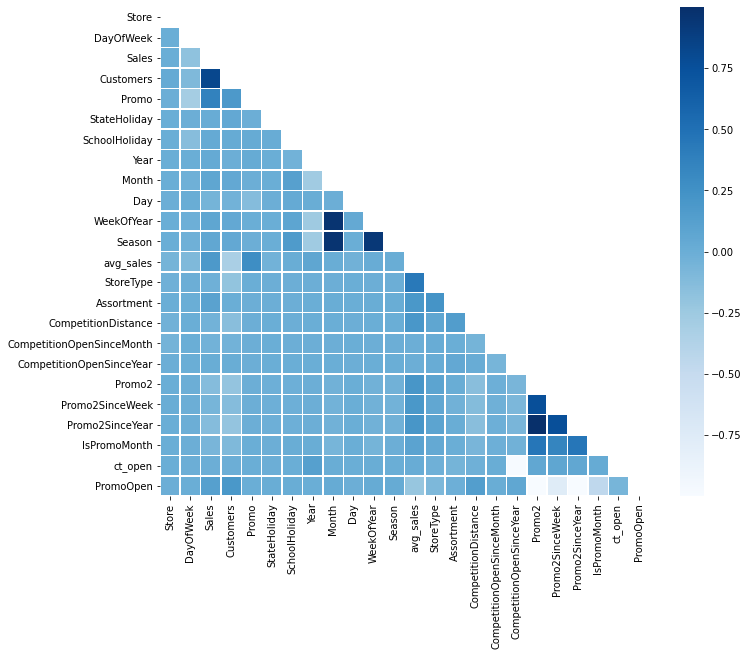

In [44]:
f, ax = plt.subplots(figsize = (11, 9))
                     
corr = train_df.drop("Open",axis=1).corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "Blues")

In [45]:
train_df.drop(['Date','Customers','Open','PromoInterval','SeasonOfYear','monthStr','avg_sales'], axis = 1, inplace = True)
test_dfxx = test_df.drop(['Id','Date','Open','PromoInterval','monthStr','SeasonOfYear'], axis = 1)


從圖表中判斷出跟sales 最有想觀的是promo

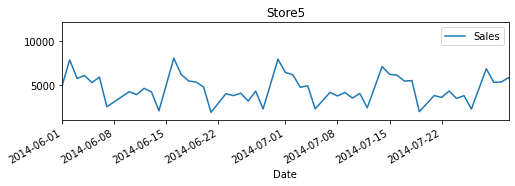

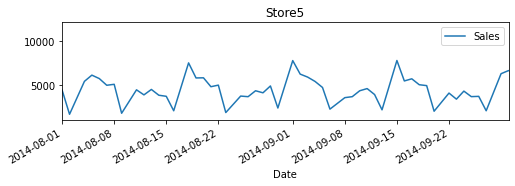

In [46]:
store_train = train[train.Sales>0]
store_train.loc[store_train['Store']==5 ,['Date','Sales']].plot(x='Date',y='Sales',title='Store5',figsize=(8,2),xlim=['2014-6-1','2014-7-31'])
store_train.loc[store_train['Store']==5 ,['Date','Sales']].plot(x='Date',y='Sales',title='Store5',figsize=(8,2),xlim=['2014-8-1','2014-9-30'])

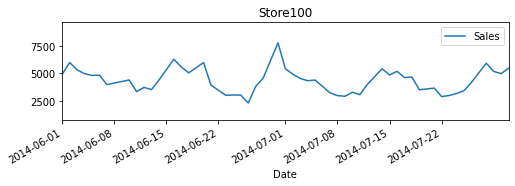

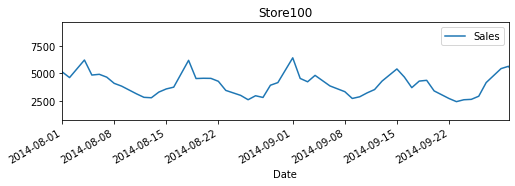

In [47]:
store_train.loc[store_train['Store']==50 ,['Date','Sales']].plot(x='Date',y='Sales',title='Store100',figsize=(8,2),xlim=['2014-6-1','2014-7-31'])
store_train.loc[store_train['Store']==50 ,['Date','Sales']].plot(x='Date',y='Sales',title='Store100',figsize=(8,2),xlim=['2014-8-1','2014-9-30'])

In [48]:
#觀察到每個店家購買的週期有一定的頻率此次分析是要分析2015的8-9月份，從圖表中觀察到2014的6-7月與2014的8-9月看似有一定的週期，外加通常會拿最接近要預測的時間的資料作為驗證集所以在此就將2015的6-7月作為驗證集

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [50]:
train_x = train_df.drop(['Sales'],axis=1)
train_y = np.log(train_df['Sales'])

X_train, X_test, y_train, y_test = train_test_split(train_x, 
                                                    train_y, 
                                                    test_size = 0.3,
                                                    random_state = 42)

In [51]:
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w

def rmspe(yhat, y):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe

def rmspe_xg(yhat, y):
    # y = y.values
    y = y.get_label()
    y = np.exp(y) - 1
    yhat = np.exp(yhat) - 1
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean(w * (y - yhat)**2))
    return "rmspe", rmspe

In [63]:

from sklearn.ensemble import RandomForestRegressor
train_x1 = train_df.drop(['Sales'],axis=1)
train_1 = train_df['Sales']
X_train1, X_test1, y_train1, y_test1 = train_test_split(train_x1, 
                                                    train_1, 
                                                    test_size = 0.3,
                                                    random_state = 42)
randomforest_test = RandomForestRegressor()
randomforest_test.fit(X_train1,np.log1p(y_train1))



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [83]:
y_pred1 = randomforest_test.predict(test_dfxx)

In [88]:
id_list = pd.read_csv('test.csv').Id.values
name = 'fusion'
submission= pd.DataFrame({'Id':id_list,'Sales':np.expm1(y_pred1)})
submission.to_csv("xgboost_rossman_submission.csv",index=False)

In [52]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

params = {
    'booster': 'gbtree',
    'objective': 'reg:linear',  # 多分类的问题
    'gamma': 0.1,                  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth': 8,               # 构建树的深度，越大越容易过拟合
    'subsample': 0.5,              # 随机采样训练样本
    'colsample_bytree': 0.3,       # 生成树时进行的列采样
    'min_child_weight': 3,
    'silent': 1,                   # 设置成1则没有运行信息输出，最好是设置为0.
    'random_state':5,
    'eta': 0.1                    # 如同学习率
     }    

In [53]:

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

watchlist = [(dtrain, 'train'), (dtest, 'test')]

In [ ]:

xgb_model = xgb.train(params, dtrain, 1000, 
                      evals = watchlist,
                      early_stopping_rounds = 500, 
                      feval = rmspe_xg,
                      verbose_eval = True)

In [ ]:
result1 = xgb.DMatrix(test_dfxx)
test_predict1 = xgb_model.predict(result1)

forecasts = pd.DataFrame({'Id': test_df['Id'], 
                          'Sales': np.exp(test_predict1)})
forecasts.to_csv('forecasts20.csv',index = False)

forecasts.head()

In [ ]:
params_skxgb = {'max_depth': 6, 
            'n_estimators': 300, # the same as num_rounds in xgboost
            'objective': 'reg:linear', 
            'subsample': 0.8, 
            'colsample_bytree': 0.8, 
            'learning_rate': 0.3, 
            'seed': 42}     

skxgb_model = XGBRegressor(**params_skxgb)

skxgb_model.fit(X_train, y_train)

In [ ]:
params_grid = {  
    'learning_rate': [0.1,0.2,0.3,0.01,0.05],
    'max_depth': [6,10,15,50,100,150],
    'gamma': [0.7,0.8,0.9,0.1,1],
    'min_child_weight': [3,5,10,20,30,50,100],
    'subsample': [0.8,1,0.5,0.3],
    'random_state':[5,10,100,200,300],
    'colsample_bytree': [0.7,0.5,0.3,0.1]
    }


search_xgb = RandomizedSearchCV(skxgb_model, params_grid, cv = 3) # 3 fold cross validation
search_xgb.fit(X_train, y_train)

# best parameters
print(search_xgb.best_params_); print(search_xgb.best_score_)

[14:09:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:38:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:40:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:43:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:45:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
X_xtrain_md = X_train_md.drop(['Sales'],axis=1 )
X_ytrain_md = np.log1p(X_train_md.Sales)
X_xtest_md = X_test_md.drop(['Sales'],axis=1 )
X_ytest_md = np.log1p(X_test_md.Sales)

In [73]:
params_final1 = {
    'booster': 'gbtree',
    'objective': 'reg:linear',  # 多分类的问题
    'gamma': 0.1,                  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
    'max_depth': 100,               # 构建树的深度，越大越容易过拟合
    'subsample': 0.8,              # 随机采样训练样本
    'colsample_bytree': 0.7,       # 生成树时进行的列采样
    'min_child_weight': 3,
    'silent': 1,                   # 设置成1则没有运行信息输出，最好是设置为0.
    'random_state':5,
    'eta': 0.1                    # 如同学习率
     }          
     

In [74]:
xgb_model_final = xgb.train(params_final1, dtrain, 300, 
                      evals = watchlist,
                      early_stopping_rounds = 200, 
                      feval = rmspe_xg,
                      verbose_eval = True)

[0]	train-rmse:7.44322	test-rmse:7.44365	train-rmspe:0.999527	test-rmspe:0.999527
Multiple eval metrics have been passed: 'test-rmspe' will be used for early stopping.

Will train until test-rmspe hasn't improved in 200 rounds.
[1]	train-rmse:6.70076	test-rmse:6.70115	train-rmspe:0.998822	test-rmspe:0.998822
[2]	train-rmse:6.0324	test-rmse:6.03288	train-rmspe:0.997553	test-rmspe:0.997553
[3]	train-rmse:5.43122	test-rmse:5.43171	train-rmspe:0.995414	test-rmspe:0.995416
[4]	train-rmse:4.89014	test-rmse:4.89064	train-rmspe:0.992041	test-rmspe:0.992045
[5]	train-rmse:4.40319	test-rmse:4.40371	train-rmspe:0.986999	test-rmspe:0.987004
[6]	train-rmse:3.96476	test-rmse:3.96527	train-rmspe:0.97986	test-rmspe:0.979868
[7]	train-rmse:3.57059	test-rmse:3.57108	train-rmspe:0.970114	test-rmspe:0.970122
[8]	train-rmse:3.21569	test-rmse:3.21621	train-rmspe:0.95751	test-rmspe:0.957519
[9]	train-rmse:2.89653	test-rmse:2.89704	train-rmspe:0.941661	test-rmspe:0.941662
[10]	train-rmse:2.60926	test-rmse:2.6

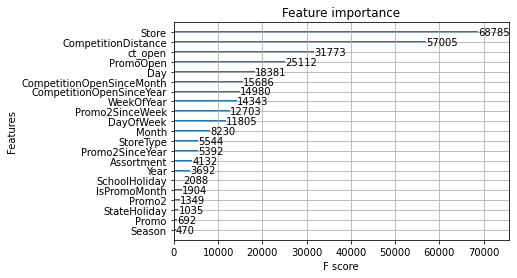

In [89]:
xgb.plot_importance(xgb_model_final)